In [42]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [43]:
diabetes_df = pd.read_csv('diabetes_clean_df')
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,binned_age
0,Female,80.0,0,1,never,25.19,6.6,140,0,senior
1,Male,28.0,0,0,never,27.32,5.7,158,0,young_adults
2,Female,36.0,0,0,current,23.45,5.0,155,0,adults
3,Male,76.0,1,1,current,20.14,4.8,155,0,senior
4,Female,20.0,0,0,never,27.32,6.6,85,0,young_adults


In [ ]:
# diabetes_df['gender']= diabetes_df['gender'].replace('Male',1)
# diabetes_df['gender']= diabetes_df['gender'].replace('Female',0)
# diabetes_df.head()

In [44]:
diabetes_df= diabetes_df.drop(columns='binned_age')

In [45]:
k_means_df = diabetes_df.copy()

In [46]:
#set targets
y = diabetes_df.diabetes.values
X = diabetes_df.drop(columns="diabetes")



In [8]:
X= pd.get_dummies(X)
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,1,0
1,28.0,0,0,27.32,5.7,158,0,1,0,0,0,1,0
2,36.0,0,0,23.45,5.0,155,1,0,0,1,0,0,0
3,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0
4,20.0,0,0,27.32,6.6,85,1,0,0,0,0,1,0


In [9]:

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [10]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model 1

In [11]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=13))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1505/1505 [==============================] - 5s 2ms/step - loss: 0.1915 - accuracy: 0.9287
Epoch 2/50
1505/1505 [==============================] - 4s 3ms/step - loss: 0.1420 - accuracy: 0.9485
Epoch 3/50
1505/1505 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9484
Epoch 4/50
1505/1505 [==============================] - 4s 3ms/step - loss: 0.1395 - accuracy: 0.9485
Epoch 5/50
1505/1505 [==============================] - 5s 3ms/step - loss: 0.1388 - accuracy: 0.9495
Epoch 6/50
1505/1505 [==============================] - 6s 4ms/step - loss: 0.1382 - accuracy: 0.9498
Epoch 7/50
1505/1505 [==============================] - 6s 4ms/step - loss: 0.1377 - accuracy: 0.9503
Epoch 8/50
1505/1505 [==============================] - 7s 4ms/step - loss: 0.1368 - accuracy: 0.9497
Epoch 9/50
1505/1505 [==============================] - 4s 3ms/step - loss: 0.1363 - accuracy: 0.9498
Epoch 10/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.135

In [12]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

502/502 - 1s - loss: 0.1072 - accuracy: 0.9614 - 644ms/epoch - 1ms/step
Loss: 0.10718081891536713, Accuracy: 0.961423397064209


In [14]:
nn_model.save("diabetes_model1.h5")

/Users/adrienek/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


502/502 [==============================] - 1s 2ms/step


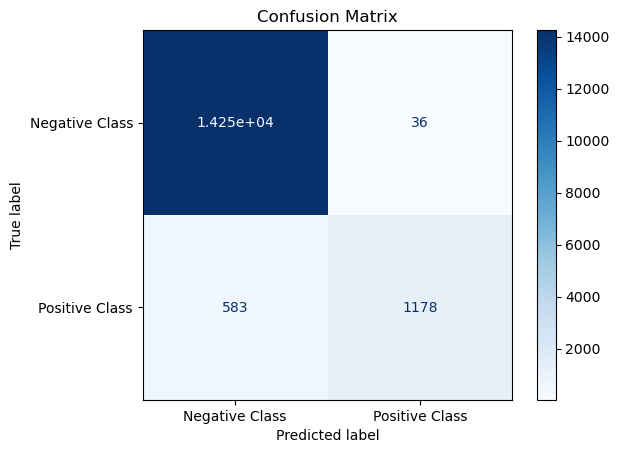

In [15]:
import numpy as np

y_pred = nn_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
# Display the confusion matrix as a heatmap
classes = ["Negative Class", "Positive Class"]  # Replace with your class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title("Confusion Matrix")
plt.show()

# Model 2

In [16]:
# Define the deep learning model
nn_model2 = tf.keras.models.Sequential()
nn_model2.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=13))
nn_model2.add(tf.keras.layers.Dense(units=18, activation="relu"))
nn_model2.add(tf.keras.layers.Dense(units=10, activation="relu"))
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Compile the Sequential model together and customize metrics
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1505/1505 [==============================] - 5s 2ms/step - loss: 0.1784 - accuracy: 0.9324
Epoch 2/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1408 - accuracy: 0.9484
Epoch 3/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1386 - accuracy: 0.9491
Epoch 4/50
1505/1505 [==============================] - 5s 3ms/step - loss: 0.1352 - accuracy: 0.9496
Epoch 5/50
1505/1505 [==============================] - 5s 4ms/step - loss: 0.1303 - accuracy: 0.9509
Epoch 6/50
1505/1505 [==============================] - 6s 4ms/step - loss: 0.1272 - accuracy: 0.9517
Epoch 7/50
1505/1505 [==============================] - 7s 4ms/step - loss: 0.1231 - accuracy: 0.9530
Epoch 8/50
1505/1505 [==============================] - 5s 3ms/step - loss: 0.1194 - accuracy: 0.9551
Epoch 9/50
1505/1505 [==============================] - 5s 3ms/step - loss: 0.1159 - accuracy: 0.9560
Epoch 10/50
1505/1505 [==============================] - 6s 4ms/step - loss: 0.112

In [17]:
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

502/502 - 1s - loss: 0.1030 - accuracy: 0.9631 - 618ms/epoch - 1ms/step
Loss: 0.10303487628698349, Accuracy: 0.963106095790863


In [ ]:
nn_model2.save("diabetes_model2.h5")

# Model 3


In [58]:
# Define the deep learning model
nn_model3 = tf.keras.models.Sequential()
nn_model3.add(tf.keras.layers.Dense(units=35, activation="relu", input_dim=13))
nn_model3.add(tf.keras.layers.Dense(units=18, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=10, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=13, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=24, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=31, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Compile the Sequential model together and customize metrics
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn_model3.fit(X_train_scaled, y_train, epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1505/1505 [==============================] - 6s 3ms/step - loss: 0.1670 - accuracy: 0.9381
Epoch 2/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1277 - accuracy: 0.9550
Epoch 3/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1173 - accuracy: 0.9590
Epoch 4/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1124 - accuracy: 0.9606
Epoch 5/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1096 - accuracy: 0.9609
Epoch 6/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9617
Epoch 7/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9614
Epoch 8/50
1505/1505 [==============================] - 4s 3ms/step - loss: 0.1051 - accuracy: 0.9625
Epoch 9/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1058 - accuracy: 0.9620
Epoch 10/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.104

In [59]:
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

502/502 - 1s - loss: 0.1031 - accuracy: 0.9626 - 712ms/epoch - 1ms/step
Loss: 0.10312505066394806, Accuracy: 0.9626075029373169


In [60]:
nn_model3.save("diabetes_model3.h5")

/Users/adrienek/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model 4
kmeans

In [47]:
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans

In [31]:
d_kmeans_df = pd.get_dummies(k_means_df)
d_kmeans_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,1,0
1,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,1,0
2,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0
3,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0
4,20.0,0,0,27.32,6.6,85,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64179,26.0,0,0,34.34,6.5,160,0,1,0,0,0,0,1,0
64180,40.0,0,0,40.69,3.5,155,0,1,0,0,0,0,1,0
64181,66.0,0,0,27.83,5.7,155,0,0,1,0,0,1,0,0
64182,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,1,0


In [48]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

In [50]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(d_kmeans_df)
    inertia.append(k_model.inertia_)

/Users/adrienek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adrienek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adrienek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adrienek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a

In [51]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,1.415065e+08
1,2,7.703881e+07
2,3,4.296832e+07
3,4,3.245151e+07
4,5,2.476944e+07


In [52]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [53]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=3, random_state=36)

# Fit the model
model.fit(d_kmeans_df)

# Make predictions
k_lower = model.predict(d_kmeans_df)

# Create a copy of the DataFrame and name it as spread_df_predictions
d_kmeans_df_predictions = d_kmeans_df.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
d_kmeans_df_predictions['clusters_lower'] = k_lower

/Users/adrienek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
# Plot the clusters
d_kmeans_df_predictions.hvplot.scatter(
    x='age',
    y="HbA1c_level",
    by="clusters_lower"
).opts(yformatter="%.0f")

:NdOverlay   [clusters_lower]
   :Scatter   [age]   (HbA1c_level)